In [1]:
#Author RSN: Ferrariic - 2/8/2021

#%matplotlib notebook
import pickle
import time
import datetime
from datetime import date
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import scipy.stats as stats
from IPython.display import clear_output
import seaborn as sns
import collections
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.datasets import load_nfl
import tensorflow as tf


#PLAYERDATA_FILE1 = np.array(pickle.load(open("PLAYER_DATA_PICKLE4.pickle", "rb")), dtype=object) #file 1 name (new file)
PLAYERDATA_FILE2 = np.array(pickle.load(open("PLAYERSHISCORES.pickle", "rb")), dtype=object) #file 2 name (old file)

#ENTRIES_FILE1 = 0
ENTRIES_FILE2 = 0

#print("FILE1: ",ENTRIES_FILE1, "SHAPE:",np.shape(PLAYERDATA_FILE1))
print("FILE2: ",ENTRIES_FILE2,"SHAPE:",np.shape(PLAYERDATA_FILE2))

#PLAYERDATA = np.concatenate((PLAYERDATA_FILE1, PLAYERDATA_FILE2)) 

PLAYERDATA = PLAYERDATA_FILE2
ENTRIES = PLAYERDATA.shape[0]

with open("PLAYER_DATA_PICKLE5.pickle", "wb") as PLAYER_DATA_PICKLE: #STORES DATA AS .PICKLE (Use N+1 to avoid overwrite)
    pickle.dump(PLAYERDATA, PLAYER_DATA_PICKLE)

print("NUMBER OF ENTRIES: ",ENTRIES)
########################################################
ID = 0 #Initial player ID

#SKILLS
PLAYER_NAME = []
PLAYER_TOTAL = [] 
PLAYER_ATTACK = []
PLAYER_DEFENCE = []
PLAYER_STRENGTH = []
PLAYER_HITPOINTS = []
PLAYER_RANGED = []
PLAYER_PRAYER = []
PLAYER_MAGIC = []
PLAYER_COOKING = []
PLAYER_WOODCUTTING = []
PLAYER_FLETCHING = []
PLAYER_FISHING = []
PLAYER_FIREMAKING = []
PLAYER_CRAFTING = []
PLAYER_SMITHING = []
PLAYER_MINING = []
PLAYER_HERBLORE = []
PLAYER_AGILITY = []
PLAYER_THIEVING = []
PLAYER_SLAYER = []
PLAYER_FARMING = []
PLAYER_RUNECRAFT = []
PLAYER_HUNTER = []
PLAYER_CONSTRUCTION = []

#BOSS/CLUES
PLAYER_BOUNTY_HUNTER_HUNTER = []
PLAYER_BOUNTY_HUNTER_ROGUE = []
PLAYER_CS_ALL = []
PLAYER_CS_BEGINNER = []
PLAYER_CS_EASY  = []
PLAYER_CS_MEDIUM  = []
PLAYER_CS_HARD  = []
PLAYER_CS_ELITE = []
PLAYER_CS_MASTER = []
PLAYER_LMS_RANK = []
PLAYER_SOUL_WARS_ZEAL = []
PLAYER_ABYSSAL_SIRE = []
PLAYER_ALCHEMICAL_HYDRA = []
PLAYER_BARROWS_CHESTS = []
PLAYER_BRYOPHYTA = []
PLAYER_CALLISTO = []
PLAYER_CERBERUS = []
PLAYER_CHAMBERS_OF_XERIC = []
PLAYER_CHAMBERS_OF_XERIC_CHALLENGE_MODE = []
PLAYER_CHAOS_ELEMENTAL = []
PLAYER_CHAOS_FANATIC = []
PLAYER_COMMANDER_ZILYANA = []
PLAYER_CORPOREAL_BEAST = []
PLAYER_CRAZY_ARCHAEOLOGIST = []
PLAYER_DAGANNOTH_PRIME = []
PLAYER_DAGANNOTH_REX = []
PLAYER_DAGANNOTH_SUPREME = []
PLAYER_DERANGED_ARCHAEOLOGIST = []
PLAYER_GENERAL_GRAARDOR = []
PLAYER_GIANT_MOLE = []
PLAYER_GROTESQUE_GUARDIANS = []
PLAYER_HESPORI = []
PLAYER_KALPHITE_QUEEN = []
PLAYER_KING_BLACK_DRAGON = []
PLAYER_KRAKEN = []
PLAYER_KREEARRA = []
PLAYER_KRIL_TSUTSAROTH = []
PLAYER_MIMIC = []
PLAYER_NIGHTMARE = []
PLAYER_OBOR = []
PLAYER_SARACHNIS = []
PLAYER_SCORPIA = []
PLAYER_SKOTIZO = []
PLAYER_THE_GAUNTLET = []
PLAYER_THE_CORRUPTED_GAUNTLET = []
PLAYER_THEATRE_OF_BLOOD = []
PLAYER_THERMONUCLEAR_SMOKE_DEVIL = []
PLAYER_TZKAL_ZUK = []
PLAYER_TZTOK_JAD = []
PLAYER_VENENATIS = []
PLAYER_VETION = []
PLAYER_VORKATH = []
PLAYER_WINTERTODT = []
PLAYER_ZALCANO = []
PLAYER_ZULRAH = []

PLAYER_ALL = [] #summation of group
PLAYER_IND = [] #individualized data (k-means orientation)

for name,scores in PLAYERDATA:
    PLAYER_NAME.append(name) #pulls name
    #ID += 1
    #PLAYER_IND.append(ID)
    
    #for skills in scores[:1]:
        #PLAYER_TOTAL.append(skills[2]) #pulls total level
        #PLAYER_IND.append(skills[2])
        
    for skills in scores[1:2]: 
        PLAYER_ATTACK.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[2:3]:
        PLAYER_DEFENCE.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[3:4]:
        PLAYER_STRENGTH.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[4:5]:
        PLAYER_HITPOINTS.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[5:6]:
        PLAYER_RANGED.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[6:7]:
        PLAYER_PRAYER.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[7:8]:
        PLAYER_MAGIC.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[8:9]:
        PLAYER_COOKING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[9:10]:
        PLAYER_WOODCUTTING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[10:11]:
        PLAYER_FLETCHING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[11:12]:
        PLAYER_FISHING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[12:13]:
        PLAYER_FIREMAKING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[13:14]:
        PLAYER_CRAFTING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[14:15]:
        PLAYER_SMITHING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[15:16]:
        PLAYER_MINING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[16:17]:
        PLAYER_HERBLORE.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[17:18]:
        PLAYER_AGILITY.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[18:19]:
        PLAYER_THIEVING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[19:20]:
        PLAYER_SLAYER.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[20:21]:
        PLAYER_FARMING.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[21:22]:
        PLAYER_RUNECRAFT.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[22:23]:
        PLAYER_HUNTER.append(skills[2])
        PLAYER_IND.append(skills[2])
        
    for skills in scores[23:24]:
        PLAYER_CONSTRUCTION.append(skills[2])
        PLAYER_IND.append(skills[2])
        
################## BOSSES AND CLUES ###################
    for skills in scores[25:26]:
        PLAYER_BOUNTY_HUNTER_HUNTER.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[26:27]:
        PLAYER_BOUNTY_HUNTER_ROGUE.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[27:28]:
        PLAYER_CS_ALL.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[28:29]:
        PLAYER_CS_BEGINNER.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[29:30]:
        PLAYER_CS_MEDIUM.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[30:31]:
        PLAYER_CS_HARD.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[31:32]:
        PLAYER_CS_ELITE.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[32:33]:
        PLAYER_CS_MASTER.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[33:34]:
        PLAYER_LMS_RANK.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[34:35]:
        PLAYER_SOUL_WARS_ZEAL.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[35:36]:
        PLAYER_ABYSSAL_SIRE.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[36:37]:
        PLAYER_ALCHEMICAL_HYDRA.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[37:38]:
        PLAYER_BARROWS_CHESTS.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[38:39]:
        PLAYER_BRYOPHYTA.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[39:40]:
        PLAYER_CALLISTO.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[40:41]:
        PLAYER_CERBERUS.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[41:42]:
        PLAYER_CHAMBERS_OF_XERIC.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[42:43]:
        PLAYER_CHAMBERS_OF_XERIC_CHALLENGE_MODE.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[43:44]:
        PLAYER_CHAOS_ELEMENTAL.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[44:45]:
        PLAYER_CHAOS_FANATIC.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[45:46]:
        PLAYER_COMMANDER_ZILYANA.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[46:47]:
        PLAYER_CORPOREAL_BEAST.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[47:48]:
        PLAYER_CRAZY_ARCHAEOLOGIST.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[48:49]:
        PLAYER_DAGANNOTH_PRIME.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[49:50]:
        PLAYER_DAGANNOTH_REX.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[50:51]:
        PLAYER_DAGANNOTH_SUPREME.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[51:52]:
        PLAYER_DERANGED_ARCHAEOLOGIST.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[52:53]:
        PLAYER_GENERAL_GRAARDOR.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[53:54]:
        PLAYER_GIANT_MOLE.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[54:55]:
        PLAYER_GROTESQUE_GUARDIANS.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[55:56]:
        PLAYER_HESPORI.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[56:57]:
        PLAYER_KALPHITE_QUEEN.append(skills[1])
        PLAYER_IND.append(skills[1]) 
        
    for skills in scores[57:58]:
        PLAYER_KING_BLACK_DRAGON.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[58:59]:
        PLAYER_KRAKEN.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[59:60]:
        PLAYER_KREEARRA.append(skills[1])
        PLAYER_IND.append(skills[1])

    for skills in scores[60:61]:
        PLAYER_KRIL_TSUTSAROTH.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[61:62]:
        PLAYER_MIMIC.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[62:63]:
        PLAYER_NIGHTMARE.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[63:64]:
        PLAYER_OBOR.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[64:65]:
        PLAYER_SARACHNIS.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[65:66]:
        PLAYER_SCORPIA.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[66:67]:
        PLAYER_SKOTIZO.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[67:68]:
        PLAYER_THE_GAUNTLET.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[68:70]:
        PLAYER_THE_CORRUPTED_GAUNTLET.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[70:71]:
        PLAYER_THEATRE_OF_BLOOD.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[71:72]:
        PLAYER_THERMONUCLEAR_SMOKE_DEVIL.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[72:73]:
        PLAYER_TZKAL_ZUK.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[73:74]:
        PLAYER_TZTOK_JAD.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[74:75]:
        PLAYER_VENENATIS.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[75:76]:
        PLAYER_VETION.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[76:77]:
        PLAYER_VORKATH.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[77:78]:
        PLAYER_WINTERTODT.append(skills[1])
        PLAYER_IND.append(skills[1])

    for skills in scores[78:79]:
        PLAYER_ZALCANO.append(skills[1])
        PLAYER_IND.append(skills[1])
        
    for skills in scores[79:80]:
        PLAYER_ZULRAH.append(skills[1])
        PLAYER_IND.append(skills[1])        
        
#######################################################################################    

PLAYER_TRUE = PLAYER_IND

PIfile = "PIfile"
pickle.dump(PLAYER_IND,open(PIfile,"wb"))

print(PLAYER_IND[0])
print(PLAYER_NAME[0])

MAX_VAL = np.amax(PLAYER_IND)
MIN_VAL = np.amin(PLAYER_IND)


print("Premax value:",MAX_VAL)
print("Premin value:",MIN_VAL)
print("Post shape: ",np.shape(PLAYER_IND))


PLAYER_IND = np.reshape(PLAYER_IND,(-1,78)) #take this below scaler to fix everything lol
print("Final shape: ",np.shape(PLAYER_IND))
########################################### DATA SCALE AND NORMALIZE [ENTRIES/78]

transformer = Normalizer(norm ='l2')
PLAYER_IND = transformer.fit_transform(PLAYER_IND)

########################################### 
MAX_VAL = np.amax(PLAYER_IND)
MIN_VAL = np.amin(PLAYER_IND)
print("Postmax value:",MAX_VAL)
print("Postmin value:",MIN_VAL)

print(PLAYER_IND[0])
print(PLAYER_NAME[0])

print(np.shape(PLAYERDATA))

FILE2:  0 SHAPE: (12869, 2)
NUMBER OF ENTRIES:  12869
559751.0
dalao888

Premax value: 200000000.0
Premin value: -1.0
Post shape:  (1003782,)
Final shape:  (12869, 78)
Postmax value: 0.9999999999999993
Postmin value: -0.11322770341445956
[ 6.72574287e-01  1.21775680e-01  3.47117403e-01  4.30331425e-01
  1.45641061e-01  1.33251778e-01  2.78204345e-01  3.07971787e-01
 -1.20155978e-06  2.97926747e-02 -1.20155978e-06  4.13697032e-02
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06  1.24601749e-03
  2.10477226e-02  1.46938745e-02  1.09220582e-01  1.20155978e-03
  2.71504447e-02 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06 -1.20155978e-06
 -1.20155978e-06 -1.20155978e-06 -1.20155978e-0

In [2]:
n_clusters = 300
kmeans = KMeans(n_clusters, init='k-means++') #KMEANS SCAN ATTEMPT
kmeans.fit(PLAYER_IND)
clusters = kmeans.cluster_centers_
y_km = kmeans.fit_predict(PLAYER_IND)

score = sklearn.metrics.silhouette_score(PLAYER_IND, kmeans.labels_, metric='euclidean')
metascore = sklearn.metrics.silhouette_samples(PLAYER_IND, kmeans.labels_, metric='euclidean')

print("Clusters:",clusters)
print("y_km:",y_km)
print("Entries:",len(y_km))
print('Silhouetter Score: %.3f' % score)
print("Metascores:",len(metascore))
print("Metascore Values:")
print(metascore)

MAX_metascore = np.amax(metascore)
MIN_metascore = np.amin(metascore)
print("Max Metascore Value:"+str(MAX_metascore))
print("Min Metascore Value:"+str(MIN_metascore))

Clusters: [[ 1.70762674e-02  2.59805446e-02  1.47799927e-02 ... -9.48028038e-06
  -9.48028038e-06 -9.48028038e-06]
 [ 2.47848575e-01  2.11009647e-01  5.12394007e-01 ...  2.68698927e-06
   6.66786111e-07  5.94058377e-06]
 [ 7.12110615e-02  6.28914449e-02  1.77285614e-01 ...  8.17662996e-07
  -2.82813899e-07  8.50364096e-06]
 ...
 [ 1.17542525e-01  9.49090189e-02  1.29724963e-01 ...  4.51333664e-06
   1.29504680e-06 -1.11678309e-07]
 [ 8.95988689e-02  8.00109049e-02  1.35938309e-01 ...  1.28919993e-05
   4.77062940e-07  1.47326819e-07]
 [ 2.38322117e-02  2.06740597e-02  2.16030889e-02 ...  3.12267740e-05
  -4.85138747e-07 -4.85138747e-07]]
y_km: [228  71   2 ...  56 231  67]
Entries: 12869
Silhouetter Score: 0.147
Metascores: 12869
Metascore Values:
[ 0.05479287  0.18610402  0.07295593 ... -0.01491066  0.14259813
  0.02057881]
Max Metascore Value:0.9969199638013684
Min Metascore Value:-0.42222756838612613


In [3]:
my_array = np.array(PLAYER_IND)
PLAYER_IND_df = pd.DataFrame(my_array, columns = [ "ID",
"ATTACK",
"DEFENCE" ,
"STRENGTH" ,
"HITPOINTS", 
"RANGED" ,
"PRAYER" ,
"MAGIC" ,
"COOKING" ,
"WOODCUTTING", 
"FLETCHING,"
"FISHING",
"FIREMAKING", 
"CRAFTING" ,
"SMITHING", 
"MINING" ,
"HERBLORE", 
"AGILITY",
"THIEVING",
"SLAYER" ,
"FARMING" ,
"RUNECRAFT", 
"HUNTER" ,
"CONSTRUCTION",
"BOUNTY_HUNTER_HUNTER",
"BOUNTY_HUNTER_ROGUE",
"CS_ALL",
"CS_BEGINNER",
"CS_EASY",
"CS_MEDIUM",
"CS_HARD",
"CS_ELITE",
"CS_MASTER",
"LMS_RANK",
"SOUL_WARS_ZEAL",
"ABYSSAL_SIRE",
"ALCHEMICAL_HYDRA",
"BARROWS_CHESTS",
"BRYOPHYTA",
"CALLISTO",
"CERBERUS",
"CHAMBERS_OF_XERIC",
"CHAMBERS_OF_XERIC_CHALLENGE_MODE",
"CHAOS_ELEMENTAL",
"CHAOS_FANATIC",
"COMMANDER_ZILYANA",
"CORPOREAL_BEAST",
"CRAZY_ARCHAEOLOGIST",
"DAGANNOTH_PRIME",
"DAGANNOTH_REX",
"DAGANNOTH_SUPREME",
"DERANGED_ARCHAEOLOGIST",
"GENERAL_GRAARDOR",
"GIANT_MOLE",
"GROTESQUE_GUARDIANS",
"HESPORI",
"KALPHITE_QUEEN",
"KING_BLACK_DRAGON",
"KRAKEN",
"KREEARRA",
"KRIL_TSUTSAROTH",
"MIMIC",
"NIGHTMARE",
"OBOR",
"SARACHNIS",
"SCORPIA",
"SKOTIZO",
"THE_GAUNTLET",
"THE_CORRUPTED_GAUNTLET",
"THEATRE_OF_BLOOD",
"THERMONUCLEAR_SMOKE_DEVIL",
"TZKAL_ZUK",
"TZTOK-JAD",
"VENENATIS",
"VETION",
"VORKATH",
"WINTERTODT",
"ZALCANO",
"ZULRAH"])

#print(PLAYER_NAME)
print(PLAYER_IND_df)
print(type(PLAYER_IND_df))

             ID    ATTACK   DEFENCE  STRENGTH     HITPOINTS    RANGED  \
0      0.672574  0.121776  0.347117  0.430331  1.456411e-01  0.133252   
1      0.034425  0.006844  0.279469  0.258758  2.286176e-01  0.013834   
2      0.212740  0.212097  0.442330  0.478107  5.591867e-01  0.148045   
3      0.070695  0.088162  0.061728  0.357407  7.282308e-01  0.039021   
4      0.089831  0.136681  0.077645  0.098912  4.095201e-02  0.015485   
...         ...       ...       ...       ...           ...       ...   
12864  0.341130  0.319106  0.452137  0.513480  2.058132e-01  0.178011   
12865  0.057367  0.080382  0.325853  0.268525  3.607020e-01  0.059691   
12866  0.349210  0.110853  0.147205  0.242265  1.661163e-01  0.023967   
12867  0.286415  0.256030  0.504726  0.488939  2.925217e-01  0.052084   
12868  0.329453  0.221220  0.261454  0.271280 -1.654475e-07  0.122525   

         PRAYER     MAGIC       COOKING  WOODCUTTING  ...  THEATRE_OF_BLOOD  \
0      0.278204  0.307972 -1.201560e-06     

In [4]:
#sns.pairplot(data=PLAYER_IND_df,y_vars="SMITHING", kind='kde')

In [5]:
##########################################################################################################
PLAYER_TEXT_FILE = open("C:\Datasets\OSRSPlayerlist\\"+str(time.strftime("%H%M%S_"))+'SIZE_'+str(len(y_km))+'_CLUSTERS_'+str(n_clusters)+'_GROUPDATA.txt', "wt") 
PLAYER_TEXT_FILE.write("File created by RSN: Ferrariic")
PLAYER_TEXT_FILE.write('\n') 
PLAYER_TEXT_FILE.write('Silhouetter Score: %.3f' % score)
PLAYER_TEXT_FILE.write('\n')
PLAYER_TEXT_FILE.write('MIN Score: %.3f' % np.amin(metascore))
PLAYER_TEXT_FILE.write('\n') 
print("Minimum Score: ",np.amin(metascore))
PLAYER_TEXT_FILE.write('\n') 

y_km_sorted = np.sort(y_km)
elements_count = collections.Counter(y_km_sorted)
for key, value in elements_count.items():
    PLAYER_TEXT_FILE.write("Group "f"{key}: {value} PLAYERS")
    PLAYER_TEXT_FILE.write('\n') 

#FILE SETUP AND INITIAL OUTPUTS WITH GROUP SIZE AND PLAYER VALUES    
##########################################################################################################

P_GROUPS = []
PLAYER_NAME_METASCORE = []
PLAYER_GROUPS_SORTED_NAME = []
PLAYER_GROUPS_SORTED_METASCORE = []
PLAYER_GROUPS_SORTED_GROUP = []

for meta in range(0,len(y_km)):
    PLAYER_NAME_METASCORE.append([metascore[meta],PLAYER_NAME[meta]])

for pnv in range(0, len(y_km)):    
    P_GROUPS.append((y_km[pnv],PLAYER_NAME_METASCORE[pnv]))    
P_GROUPS.sort()

PLAYER_GROUPS_SORTED = np.array(P_GROUPS)
for i in range(0,len(y_km)):
    PLAYER_GROUPS_SORTED_GROUP.append(P_GROUPS[i][0])
    PLAYER_GROUPS_SORTED_METASCORE.append(P_GROUPS[i][1][0])
    PLAYER_GROUPS_SORTED_NAME.append(P_GROUPS[i][1][1])

#OUTPUTS - PLAYER_GROUPS_SORTED_METASCORE/NAME/GROUP - INDIVIDUAL VALUES
##########################################################################################################

PLAYER_TRUE_RESHAPE_STR = []
PLAYER_TRUE_RESHAPE_SORTED = []
value_array = []

i = 0
j = 0
PLAYER_STATS_PREMEAN = []
for j in range(0,ENTRIES):
    for i in range(1,79):
        PLAYER_STATS_PREMEAN.append(PLAYERDATA[j][1][i][1])

PLAYER_TRUE_RESHAPE = np.resize(PLAYER_STATS_PREMEAN,(ENTRIES,78))

i = 0
for i in range(0,len(y_km)): 
    PLAYER_TRUE_RESHAPE_TEMP = PLAYER_TRUE_RESHAPE[i].tolist()
    PLAYER_TRUE_RESHAPE_STR.append(PLAYER_TRUE_RESHAPE_TEMP)
PLAYER_TRUE_RESHAPE_SORTED = [x for _,x in sorted(zip(y_km,PLAYER_TRUE_RESHAPE_STR))]
PLAYER_TRUE_RESHAPE_SORTED_ARRAY = np.asarray(PLAYER_TRUE_RESHAPE_SORTED)

######################### PREWORK FOR BELOW SECTION ###########################

i = 0
player_location_in_list = 0
player_premean_array = []
group_mean_array = []
group_mean_array_grouped = []
group_mean_array_numpy_int = []

y_km_sorted = np.sort(y_km)
elements_count = collections.Counter(y_km_sorted)
for key, value in elements_count.items():
    key_int = key.astype(int)
    value_array.append(value)
    #print(str(key_int)+" "+str(value_array))
    
for i in range(0,len(value_array)): 
    player_location_in_list_old = player_location_in_list
    player_location_in_list = player_location_in_list+value_array[i]
    for skill_value in range(0,78):
        group_mean_array.append(np.mean(PLAYER_TRUE_RESHAPE_SORTED_ARRAY[player_location_in_list_old:player_location_in_list,skill_value]))

group_mean_array_numpy = np.asarray(group_mean_array)
for gma in range(0,len(group_mean_array_numpy)):
    group_mean_array_numpy_int.append(group_mean_array_numpy[gma].astype(int))
    
group_mean_array_grouped = np.reshape(group_mean_array_numpy_int,(n_clusters,78))

#OUTPUTS MEAN OF PLAYER DATA: group_mean_array_grouped(n_clusters)
###################################################################################################

n = 0
gmc = 0

PLAYER_TEXT_FILE.write("\n")
PLAYER_TEXT_FILE.write("GROUP "+str(gmc))
PLAYER_TEXT_FILE.write("\n")
PLAYER_TEXT_FILE.write("_____________________________________________________________")
PLAYER_TEXT_FILE.write("\n")
PLAYER_TEXT_FILE.write(("AVERAGE PLAYER WITHIN GROUP "+str(gmc)+":"))
PLAYER_TEXT_FILE.write("\n")
PLAYER_TEXT_FILE.write(str(group_mean_array_grouped[gmc]))
PLAYER_TEXT_FILE.write("\n")
            
for group_n in range(0,len(y_km)):
    if(PLAYER_GROUPS_SORTED_GROUP[group_n]==n):
        PLAYER_TEXT_FILE.write(str(PLAYER_GROUPS_SORTED_GROUP[group_n])+" "+"{:.2f}".format(PLAYER_GROUPS_SORTED_METASCORE[group_n])+" "+str(PLAYER_GROUPS_SORTED_NAME[group_n]))
    else:
        gmc += 1
        if(PLAYER_GROUPS_SORTED_GROUP[group_n]==gmc):
            PLAYER_TEXT_FILE.write("\n")
            PLAYER_TEXT_FILE.write("GROUP "+str(gmc))
            PLAYER_TEXT_FILE.write("\n")
            PLAYER_TEXT_FILE.write("_____________________________________________________________")
            PLAYER_TEXT_FILE.write("\n")
            PLAYER_TEXT_FILE.write(("AVERAGE PLAYER WITHIN GROUP "+str(gmc)+":"))
            PLAYER_TEXT_FILE.write("\n")
            PLAYER_TEXT_FILE.write(str(group_mean_array_grouped[gmc]))
            PLAYER_TEXT_FILE.write("\n")
        PLAYER_TEXT_FILE.write(str(PLAYER_GROUPS_SORTED_GROUP[group_n])+" "+"{:.2f}".format(PLAYER_GROUPS_SORTED_METASCORE[group_n])+" "+str(PLAYER_GROUPS_SORTED_NAME[group_n]))
        n += 1

PLAYER_TEXT_FILE.close()
print("FINISHED")

Minimum Score:  -0.42222756838612613


<ipython-input-5-887b6cce267d>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  PLAYER_GROUPS_SORTED = np.array(P_GROUPS)


FINISHED


In [6]:
np.shape(PLAYER_IND) #features
np.shape(y_km) #labels

XX_train, XX_test, yy_train, yy_test = train_test_split(PLAYER_IND, y_km, test_size=0.1)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute')
knn.fit(XX_train,yy_train)
yy_pred = knn.predict(XX_test)

print("Accuracy:",metrics.accuracy_score(yy_test, yy_pred))

############## PLAYER LOOKUP #################

name = "Ferrariic"
namemod = name+"\n"

ind = PLAYER_NAME.index(namemod)

player_predict = knn.predict(PLAYER_IND[ind].reshape(1,-1))
player_predprob = knn.predict_proba(PLAYER_IND[ind].reshape(1,-1))
print("Predicted group: ", player_predict)
print(player_predprob)
print(PLAYER_IND[ind].reshape(1,-1))
print(y_km[ind])
print(PLAYER_NAME[ind])
print(ind)

knnfile = "OSRS_KNN_V1"
ykmfile = "ykmfile"
traindata = "traindata"
pnamefile = "pnamefile"

pickle.dump(knn,open(knnfile,"wb"))
pickle.dump(y_km,open(ykmfile,"wb"))
pickle.dump(PLAYER_IND,open(traindata,"wb"))
pickle.dump(PLAYER_NAME,open(pnamefile,"wb"))


Accuracy: 0.7521367521367521
Predicted group:  [89]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 2.45274146e-01  2

In [7]:
osrsknn = pickle.load(open("OSRS_KNN_V1","rb")) #LOAD PROGRAM
osrsknn_predict = osrsknn.predict(PLAYER_IND[2].reshape(1,-1))
print(osrsknn_predict)
print(y_km[2])

[2]
2


IndexError: list index out of range

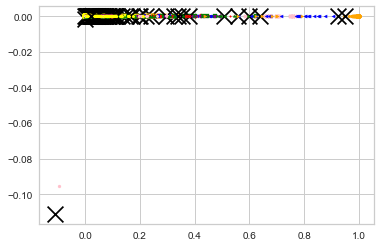

In [8]:
color = ['red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow','red','purple','green','blue','orange','pink','yellow']
marker = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']


Skilldict = {
"ATTACK" : 0,
"DEFENCE" : 1,
"STRENGTH" : 2,
"HITPOINTS" : 3,
"RANGED" : 4,
"PRAYER" : 5,
"MAGIC" : 6,
"COOKING" : 7,
"WOODCUTTING" : 8,
"FLETCHING" : 9,
"FISHING" : 10,
"FIREMAKING" : 11,
"CRAFTING" : 12,
"SMITHING" : 13,
"MINING" : 14,
"HERBLORE" : 15,
"AGILITY" : 16,
"THIEVING" : 17,
"SLAYER" : 18,
"FARMING" : 19,
"RUNECRAFT" : 20,
"HUNTER" : 21,
"CONSTRUCTION" : 22,
"BOUNTY_HUNTER_HUNTER":23,
"BOUNTY_HUNTER_ROGUE":24,
"CS_ALL":25,
"CS_BEGINNER":26,
"CS_EASY":27,
"CS_MEDIUM":28,
"CS_HARD":29,
"CS_ELITE":30,
"CS_MASTER":31,
"LMS_RANK":32,
"SOUL_WARS_ZEAL":33,
"ABYSSAL_SIRE":34,
"ALCHEMICAL_HYDRA":35,
"BARROWS_CHESTS":36,
"BRYOPHYTA":37,
"CALLISTO":38,
"CERBERUS":39,
"CHAMBERS_OF_XERIC":40,
"CHAMBERS_OF_XERIC_CHALLENGE_MODE":41,
"CHAOS_ELEMENTAL":42,
"CHAOS_FANATIC":43,
"COMMANDER_ZILYANA":44,
"CORPOREAL_BEAST":45,
"CRAZY_ARCHAEOLOGIST":46,
"DAGANNOTH_PRIME":47,
"DAGANNOTH_REX":48,
"DAGANNOTH_SUPREME":49,
"DERANGED_ARCHAEOLOGIST":50,
"GENERAL_GRAARDOR":51,
"GIANT_MOLE":52,
"GROTESQUE_GUARDIANS":53,
"HESPORI":54,
"KALPHITE_QUEEN":55,
"KING_BLACK_DRAGON":56,
"KRAKEN":57,
"KREEARRA":58,
"KRIL_TSUTSAROTH":59,
"MIMIC":60,
"NIGHTMARE":61,
"OBOR":62,
"SARACHNIS":63,
"SCORPIA":64,
"SKOTIZO":65,
"THE_GAUNTLET":66,
"THE_CORRUPTED_GAUNTLET":67,
"THEATRE_OF_BLOOD":68,
"THERMONUCLEAR_SMOKE_DEVIL":69,
"TZKAL_ZUK":70,
"TZTOK-JAD":71,
"VENENATIS":72,
"VETION":73,
"VORKATH":74,
"WINTERTODT":75,
"ZALCANO":76,
"ZULRAH":77
}

xaxis = 11
yaxis = 75
zaxis = 2

for i in range(0,n_clusters):
    plt.scatter(PLAYER_IND[y_km == i,xaxis], PLAYER_IND[y_km == i,yaxis], s = 10, color = color[i], marker = marker[i])
    plt.scatter(clusters[i][xaxis], clusters[i][yaxis], s = 250, color = 'black',  marker = 'x')
plt.xlabel(str(xaxis))
plt.ylabel(str(yaxis))
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,n_clusters):
    ax.scatter(PLAYER_IND[y_km == i,xaxis], PLAYER_IND[y_km == i,yaxis], PLAYER_IND[y_km == i,zaxis], s = 10, color = color[i],  marker = marker[i])
    ax.scatter(clusters[i][xaxis], clusters[i][yaxis], clusters[i][zaxis], s = 250,color = 'black', marker = 'x')
ax.set_xlabel(str(xaxis))
ax.set_ylabel(str(yaxis))
ax.set_zlabel(str(zaxis))

p = sns.jointplot(data=PLAYER_IND,x=PLAYER_IND[:,xaxis], y=PLAYER_IND[:,yaxis], kind='reg', space=0, height=5, ratio=4)
p.plot_marginals(sns.rugplot, color="r", height=-0.15, clip_on= False)
p.plot_joint(sns.kdeplot, color="r", zorder=5, levels=10)
